In [49]:
import os
import pandas as pd
# import matplotlib.pyplot as plt

fut_ny_open = pd.read_csv(os.path.join('..', 'data', 'processed', 'futures', 'futures_usd_notional_ny_open.csv'), index_col=0).sort_index()
fut_dom_close = pd.read_csv(os.path.join('..', 'data', 'processed', 'futures', 'futures_usd_notional_domestic_close.csv'), index_col=0).sort_index()
fut_ny_close = pd.read_csv(os.path.join('..', 'data', 'processed', 'futures', 'futures_usd_notional_ny_close.csv'), index_col=0).sort_index()
fut_fixed_time = pd.read_csv(os.path.join('..', 'data', 'processed', 'futures', 'futures_usd_notional_fixed_time.csv'), index_col=0).sort_index()

adr_ny_open = pd.read_csv(os.path.join('..', 'data', 'raw', 'adrs','adr_PX_OPEN_adjust_none.csv'), index_col=0).sort_index()
adr_dom_close = pd.read_csv(os.path.join('..', 'data', 'processed', 'adrs','adr_mid_at_ord_auction_adjust_none.csv'), index_col=0).sort_index()
adr_ny_close = pd.read_csv(os.path.join('..', 'data', 'raw', 'adrs','adr_PX_LAST_adjust_none.csv'), index_col=0).sort_index()
adr_fixed_time = pd.read_csv(os.path.join('..', 'data', 'processed', 'adrs','daily_mid_for_cov.csv'), index_col=0).sort_index()

In [51]:
adr_ny_open.loc['2025-12-09','BCS']

23.35

In [56]:
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

all_corr = []
for ticker in adr_ny_open.columns:
    pre_fut_ret = (fut_dom_close[ticker] / fut_ny_open[ticker]) - 1
    post_fut_ret = (fut_ny_close[ticker] / fut_fixed_time[ticker]) - 1
    pre_adr_ret = (adr_dom_close[ticker] / adr_ny_open[ticker]) - 1
    post_adr_ret = (adr_ny_close[ticker] / adr_fixed_time[ticker]) - 1

    pre_overperformance = pd.Series(winsorize(pre_adr_ret - pre_fut_ret, limits=[0.01, 0.01]))
    post_overperformance = pd.Series(winsorize(post_adr_ret - post_fut_ret, limits=[0.01, 0.01]))
    #plt.figure()
    #plt.scatter(pre_overperformance, post_overperformance)
    #plt.title(ticker)
    all_corr.append(pre_overperformance.corr(post_overperformance))
    print(ticker, pre_overperformance.corr(post_overperformance))

UL 0.06611410134542506
GSK 0.03077881167101544
PUK 0.010088837260199055
GMAB -0.04179043062623157
SAP -0.01552871110026936
BP 0.007554313316452664
PHG -0.05691459016056555
ING -0.004135361189947042
SAN -0.026417651981312934
LYG -0.01930715138903566
DB -0.02066105035178698
EQNR 0.10018145263029637
NOK -0.04261992846122388
UBS -0.009581343716978124
AZN 0.034355585647109846
NVO -0.005834346253854134
BTI 0.022244607082647316
TS 0.045895929054389197
AEG -0.05389788356192852
BUD -0.05679725490571506
HLN 0.027860241810582834
E 0.050534303228525985
NWG 0.009814570318123795
RIO -0.015279902136626887
PSO 0.013735463875352117
IHG -0.036191258287847354
ARGX 0.033167557148190197
RYAAY 0.031569694490081984
SNY 0.04216334614201937
VOD 0.01892187864810945
ERIC -0.04886972260214274
HSBC -0.03581105344400083
DEO -0.019219680150234265
RELX 8.692123155375935e-05
SHEL 0.057219746977683617
ASML 0.09989998852287248
RTO 0.052639733325896235
SNN 0.05647508491087297
NGG -0.023452148554084774
FMS -0.017191815013

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 3., 5., 3., 8., 5., 5., 6., 4.,
        3., 0., 2.]),
 array([-0.20126052, -0.18618842, -0.17111632, -0.15604422, -0.14097212,
        -0.12590003, -0.11082793, -0.09575583, -0.08068373, -0.06561163,
        -0.05053953, -0.03546743, -0.02039534, -0.00532324,  0.00974886,
         0.02482096,  0.03989306,  0.05496516,  0.07003726,  0.08510935,
         0.10018145]),
 <BarContainer object of 20 artists>)

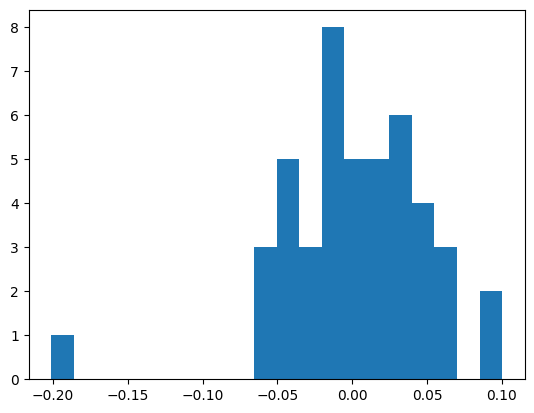

In [60]:
plt.hist(all_corr, bins=20)

HLN -0.6328796086961996
NWG -0.6699333750098163
BCS -0.7128330245117446
SAN -0.5361945471908053
SNN -0.5572223941226478
E -0.40001827098487286
TS -0.6543283575768524
AZN -0.4866580259132988
NGG -0.3809395848711799
SNY -0.36677215704681543
HSBC -0.17089206715257327
RIO -0.49822472736004036
IHG -0.6534254212482521
FMS -0.33702177834005564
SHEL -0.5646302823310252
BBVA -0.5425750710844208
DB -0.5886725211582611
DEO -0.34467113402841143
AEG -0.5636023018742871
BP -0.6146195268590027
ARGX -0.7730868728168045
RELX -0.2939821581685066
NOK -0.6922749401849694
PSO -0.2760239383881438
PHG -0.39443788915511063
BUD -0.34295901761264536
RYAAY -0.7076561262782696
ASML -0.7833912261720843
PUK -0.6923058027306209
WPP -0.5578666299592772
BTI -0.37579719972393644
ING -0.4230416901509274
SAP -0.4433772645621252
LYG -0.730233689919985
TTE -0.05076323372391982
UL -0.2662367409672989
GSK -0.5009111103871415
VOD -0.42995113823076425


/tmp/ipykernel_407732/1083678886.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


RTO -0.7488251214836633


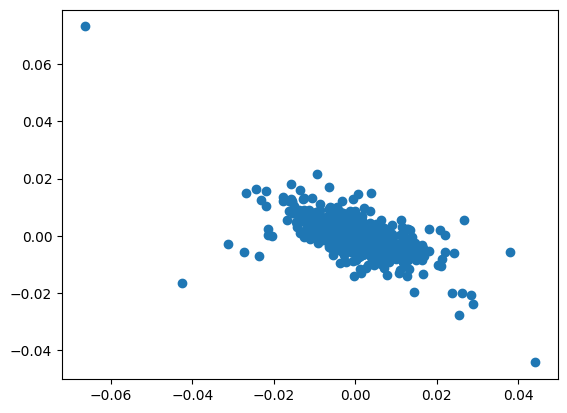

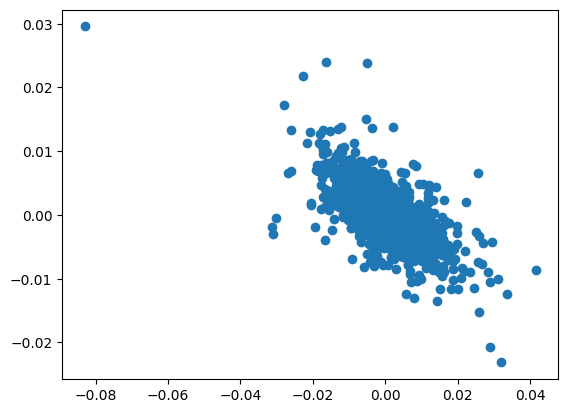

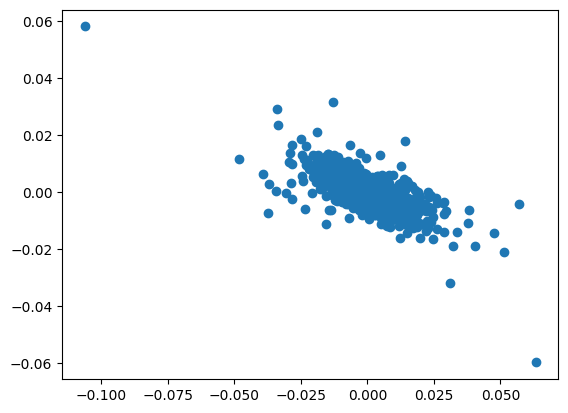

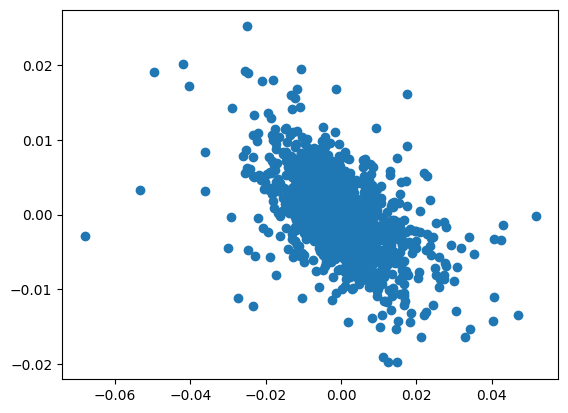

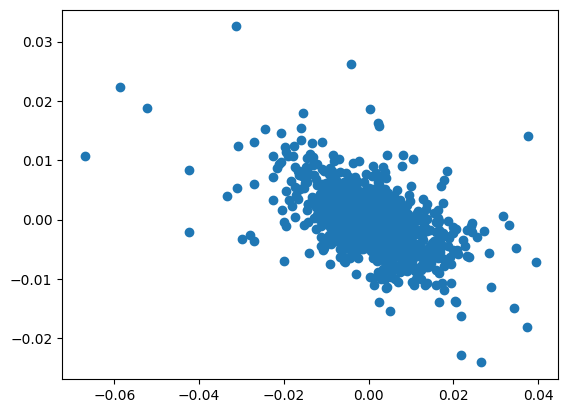

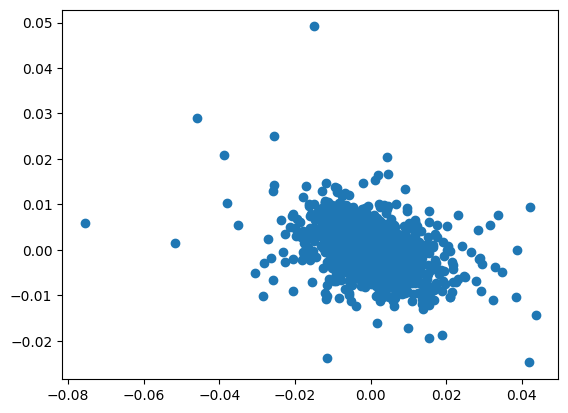

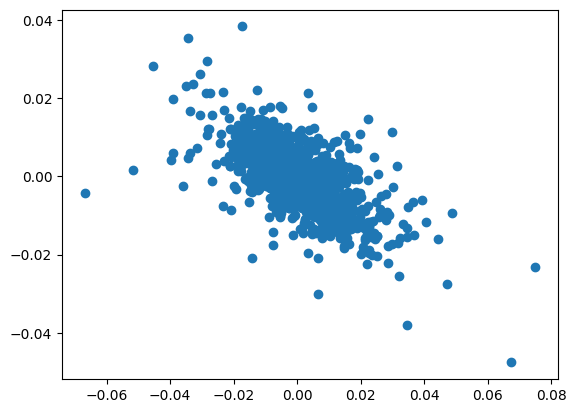

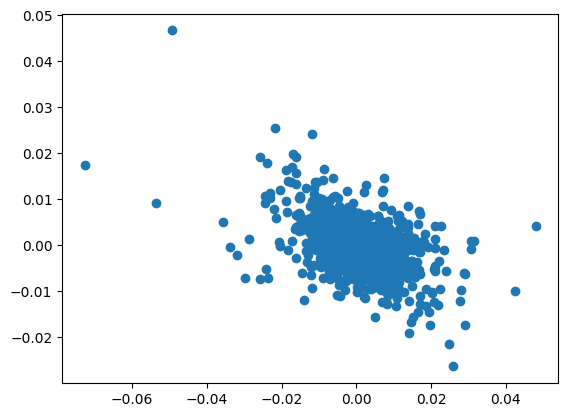

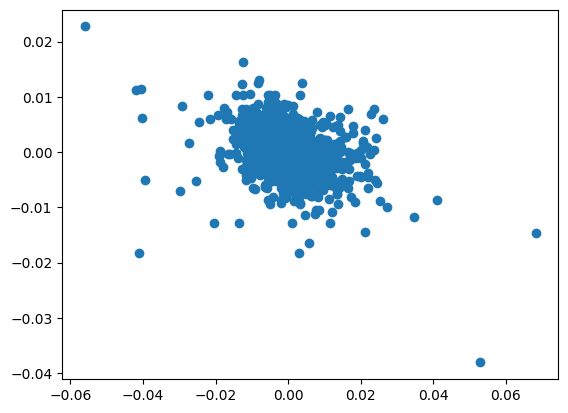

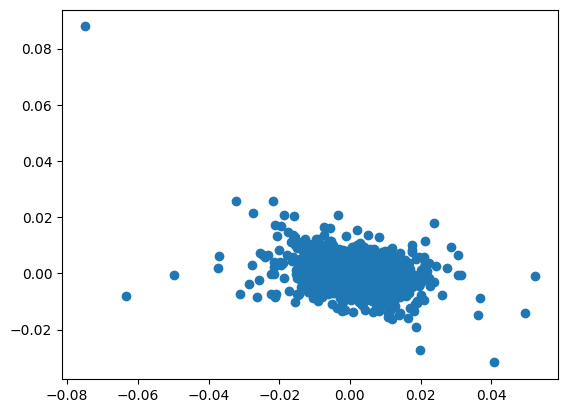

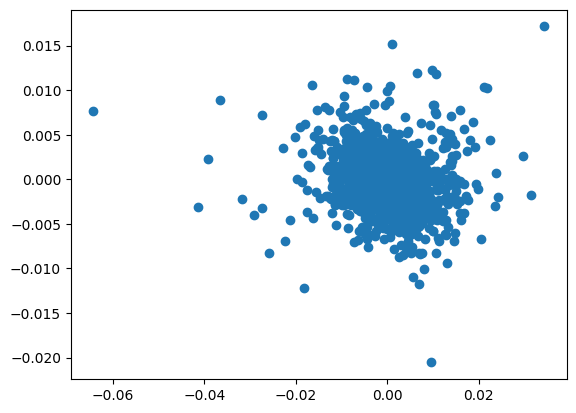

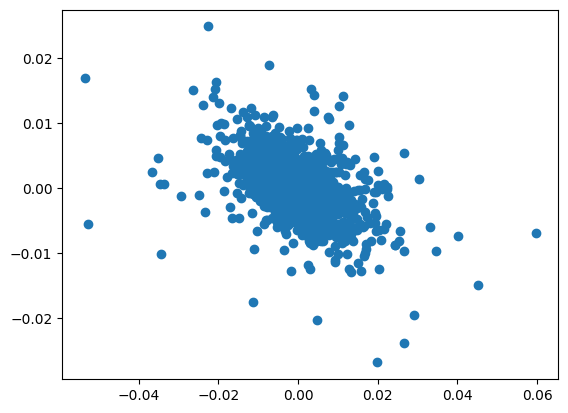

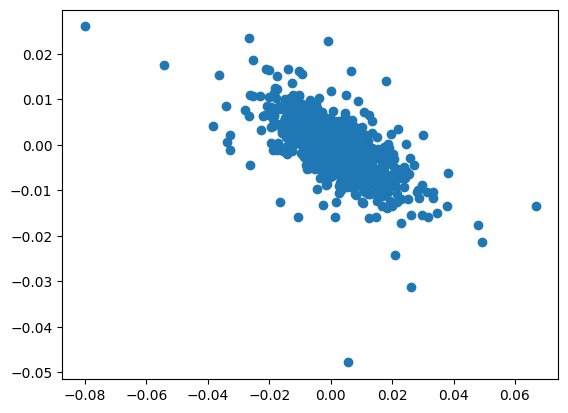

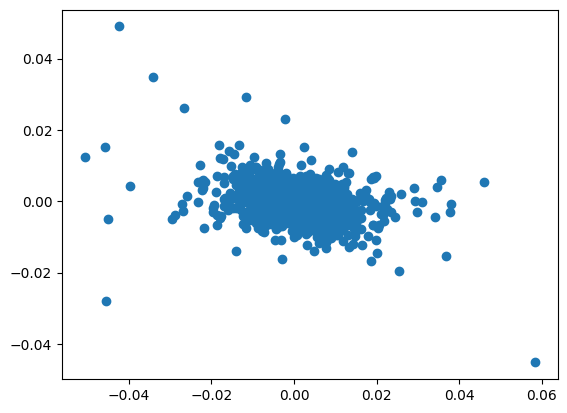

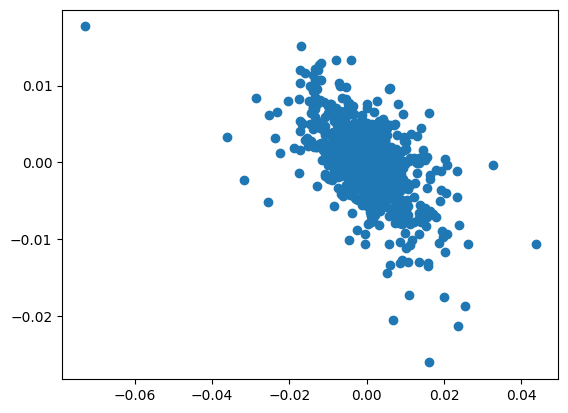

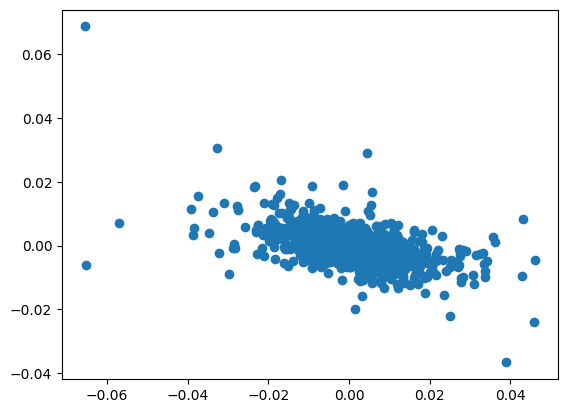

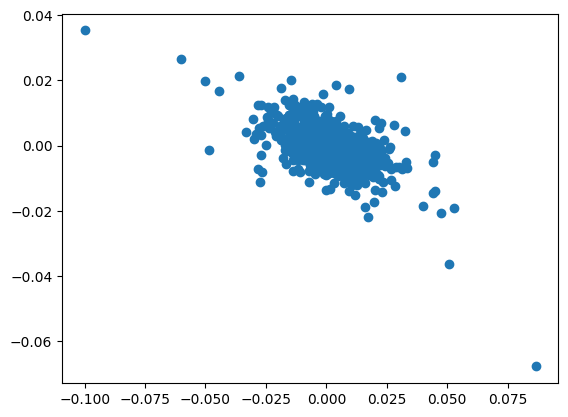

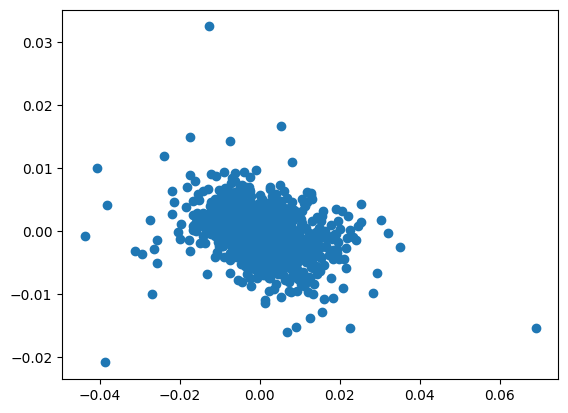

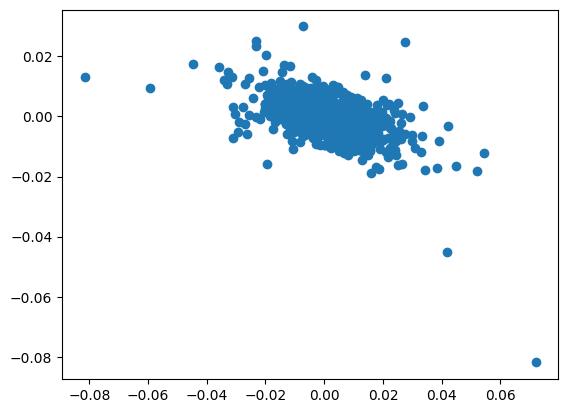

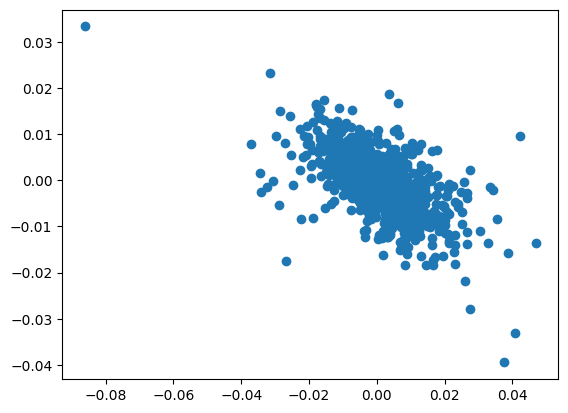

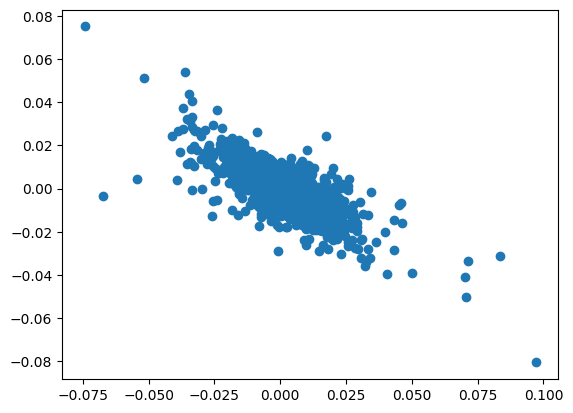

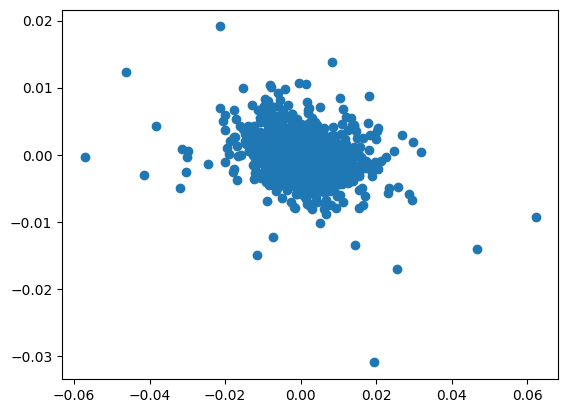

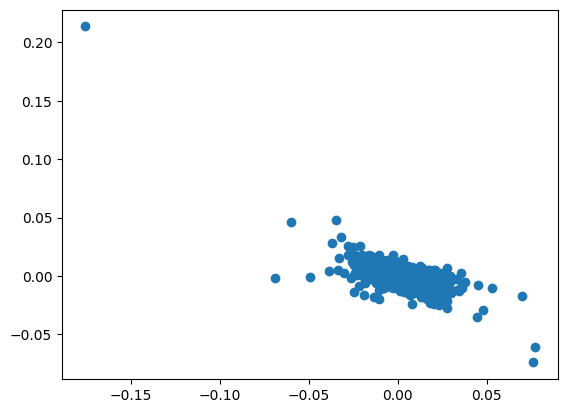

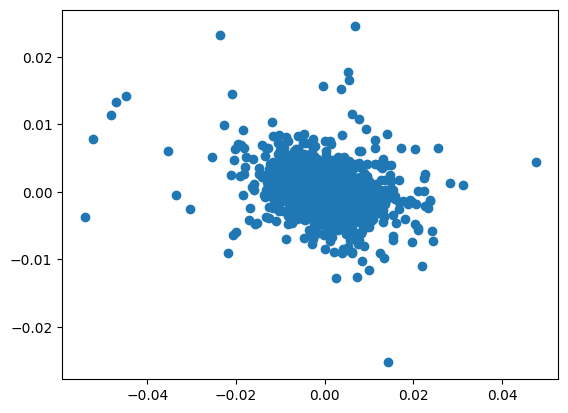

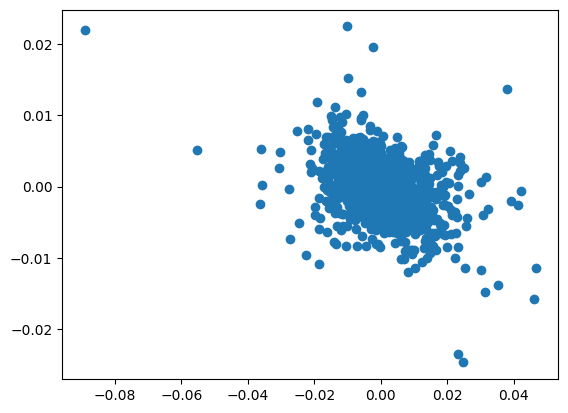

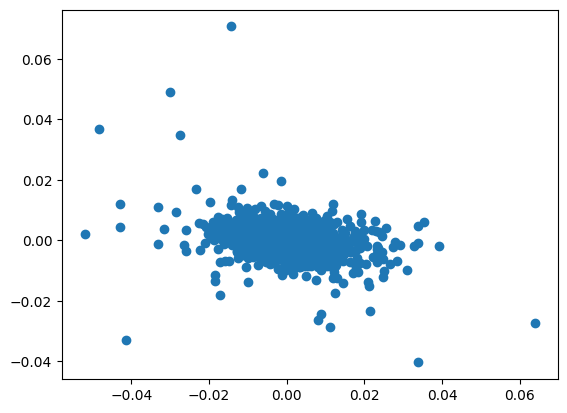

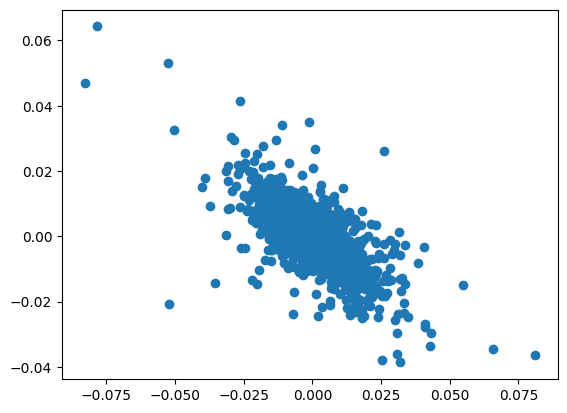

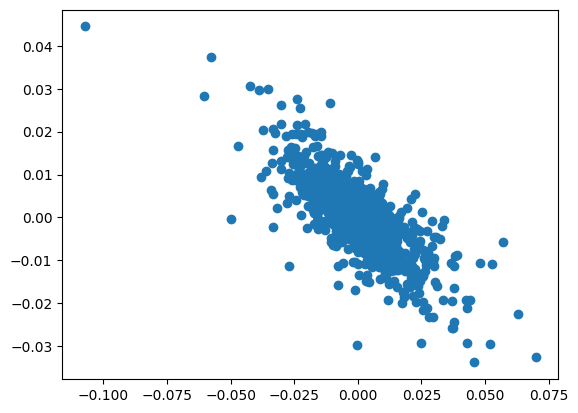

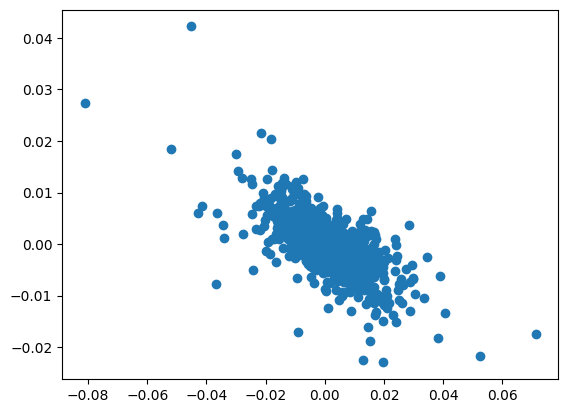

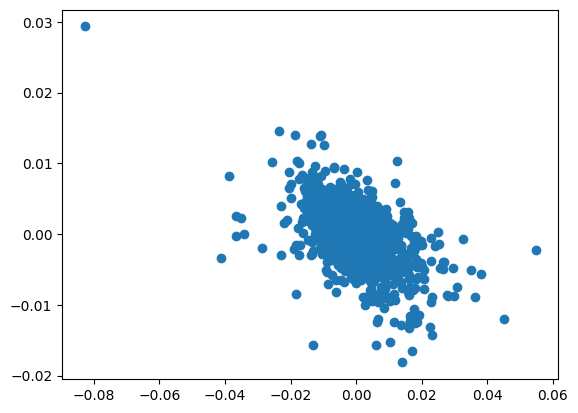

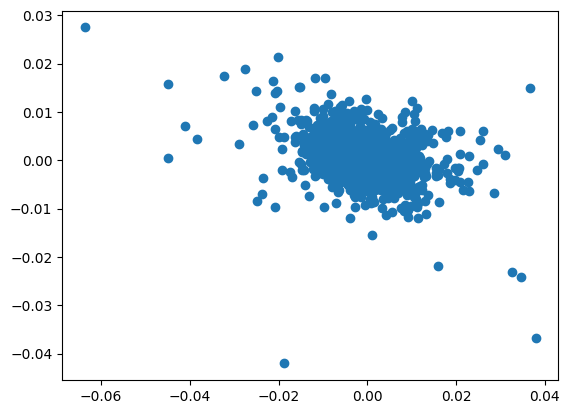

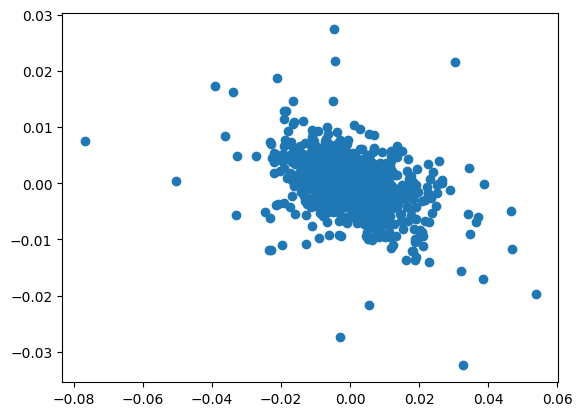

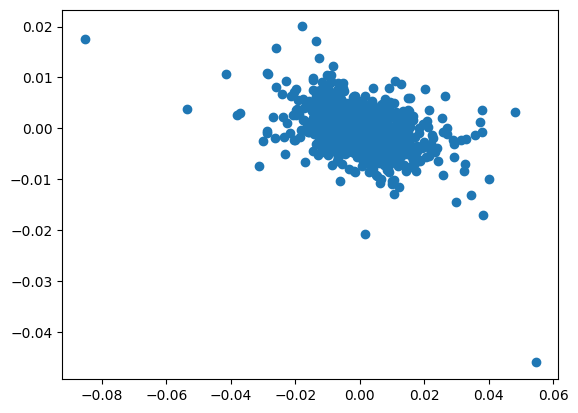

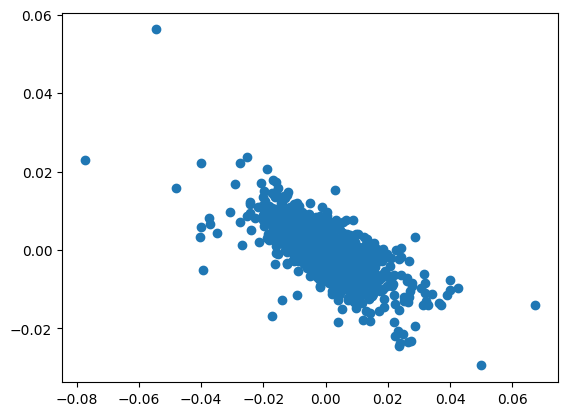

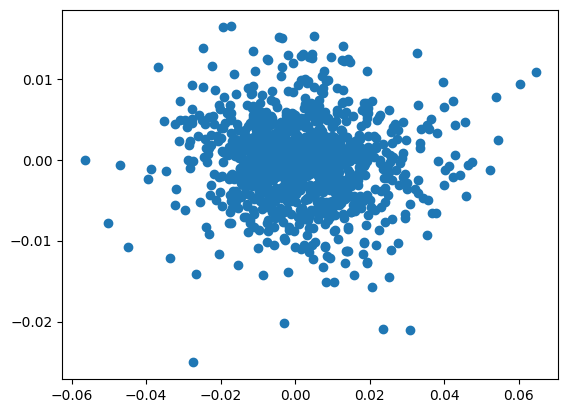

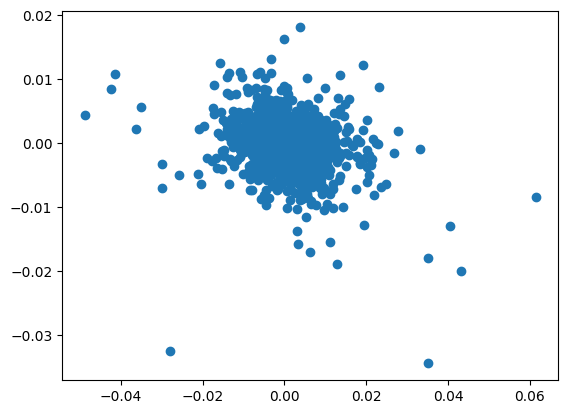

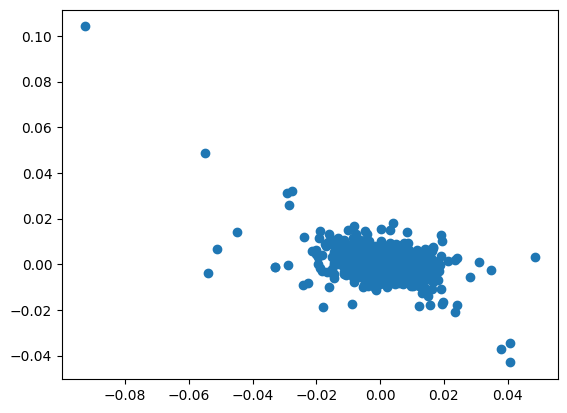

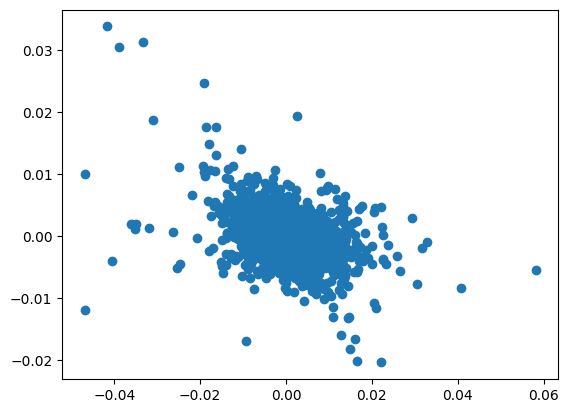

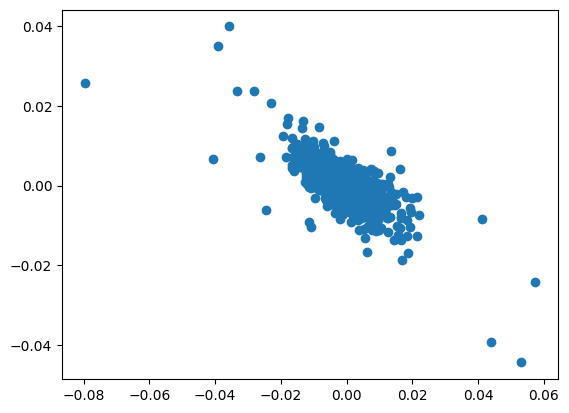

In [13]:
import matplotlib.pyplot as plt

for ticker in adr_ny_open.columns:
    pre_fut_ret = (fut_dom_close[ticker] / fut_ny_open[ticker]) - 1
    post_fut_ret = (fut_ny_close[ticker] / fut_dom_close[ticker]) - 1
    pre_adr_ret = (adr_dom_close[ticker] / adr_ny_open[ticker]) - 1
    post_adr_ret = (adr_ny_close[ticker] / adr_dom_close[ticker]) - 1

    pre_overperformance = pre_adr_ret - pre_fut_ret
    post_overperformance = post_adr_ret - post_fut_ret
    plt.figure()
    plt.scatter(pre_overperformance, post_overperformance)
    print(ticker, pre_overperformance.corr(post_overperformance))

NameError: name 'os' is not defined